# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## 1. Описание и загрузка данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.
+ сalls — количество звонков,
+ minutes — суммарная длительность звонков в минутах,
+ messages — количество sms-сообщений,
+ mb_used — израсходованный интернет-трафик в Мб,
+ is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
usage = pd.read_csv('/datasets/users_behavior.csv')
usage.info()
usage.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Данные хорошо подготовлены. Отсутствуют пропуски и неадекватные значения.

## 2. Разделение на выборки

Разделим исходные данные на три выборки: тренировучную - 60%, валидационную - 20%, тестовую - 20%.

In [3]:
usage_train, valid_test = train_test_split(usage, test_size=0.4, random_state=2020)
usage_valid, usage_test = train_test_split(valid_test, test_size=0.5, random_state=2020)

## 3. Исследование моделей

Выделим столбцы с признаками и целевым признаком в каждой из выборок.

In [4]:
features_train = usage_train.drop(['is_ultra'], axis=1)
target_train = usage_train['is_ultra']
features_valid = usage_valid.drop(['is_ultra'], axis=1)
target_valid = usage_valid['is_ultra']
features_test = usage_test.drop(['is_ultra'], axis=1)
target_test = usage_test['is_ultra']

### Модель _дерево решений_

   train_score valid_score
1     0.745332    0.751166
2     0.781639    0.766719
3     0.794606     0.77916
4     0.802386    0.782271
5     0.817946     0.77605
6     0.832469     0.77605
7      0.84388    0.780715
8     0.853216    0.766719
9     0.868257    0.771384
10     0.88278    0.786936
11    0.889523     0.77605
12     0.90249    0.769829
13    0.920643    0.755832
14    0.938278    0.746501
15     0.95332     0.74028
16    0.968361    0.729393
17    0.975622    0.734059
18    0.983921    0.721617
19    0.990664    0.730949
20    0.995851    0.723173
21    0.998444    0.735614
22           1    0.721617
23           1    0.721617
24           1    0.721617
25           1    0.721617


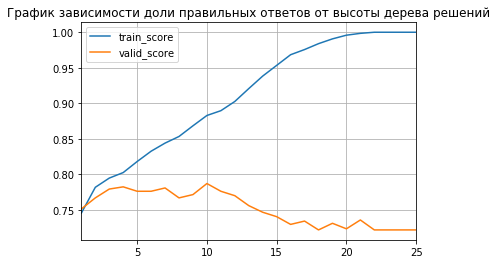

In [5]:
columns = ['train_score', 'valid_score']
accuracy_tree = pd.DataFrame(columns=columns)
for i in range(1, 26):
    model = DecisionTreeClassifier(random_state=2020, max_depth=i)
    model.fit(features_train, target_train)
    accuracy_train = model.score(features_train, target_train)
    accuracy_valid = model.score(features_valid, target_valid)
    accuracy_tree.loc[i, 'train_score'] = accuracy_train
    accuracy_tree.loc[i, 'valid_score'] = accuracy_valid
#    print('max_depth = {:.0f} :'.format(i), accuracy_valid)
    
print(accuracy_tree)
accuracy_tree.plot(grid=True, title='График зависимости доли правильных ответов от высоты дерева решений');

С увеличением гиперпараметра _max_depth_ (высота дерева) доля правильных ответов на тренировочной выборке стремится к 1, в то время как на валидационной выборке доля правильных ответов растёт только до некоторой величины _max_depth_ , а затем их количество начинает снижаться. Налицо переобучение модели.  
__Вывод:__ нет смысла сильно увеличивать высоту дерева, следует экспериментальным путём определить оптимальный вариант. В данном случае лучший результат проявляется при _max_depth = 10_.

### Модель _случайный лес_

##### Влияние гиперпараметра n_estimators
Зафиксируем _max_depth_ и посмотрим как будет меняться доля правильных ответов с изменение *n_estimators* .

   train_score valid_score
1     0.855809    0.752722
3     0.880187    0.762053
5     0.878112    0.766719
7     0.884336    0.772939
9     0.886929     0.77605
11    0.884336    0.774495
13    0.887448    0.783826
15    0.885892    0.790047
17    0.887448    0.788491
19    0.885892    0.785381
21    0.888485    0.783826
23    0.888485    0.785381
25    0.889523    0.788491
27    0.886929    0.790047
29    0.887448    0.793157
31    0.887967    0.788491
33    0.888485    0.791602
35    0.886411    0.791602
37    0.887448    0.788491
39    0.887448    0.788491
41    0.887967    0.785381
43    0.888485    0.786936
45    0.889523    0.786936
47    0.887448    0.791602
49    0.889004    0.786936
51    0.887448    0.786936
53    0.887967    0.786936
55    0.886929    0.786936
57    0.886929    0.790047
59    0.887448    0.790047
61    0.886929    0.788491


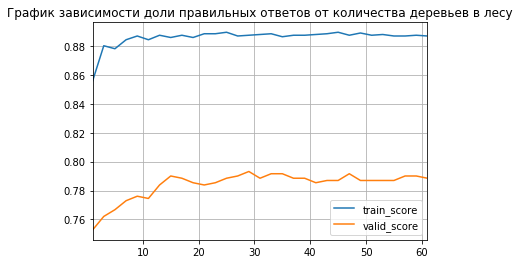

In [6]:
accuracy_forest = pd.DataFrame(columns=columns)
for i in range(1, 62, 2):
    model = RandomForestClassifier(random_state=2020, n_estimators=i, max_depth=10)
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    train_predictions = model.predict(features_train)
    accuracy_train = model.score(features_train, target_train)
    accuracy_valid = model.score(features_valid, target_valid)
    accuracy_forest.loc[i, 'train_score'] = accuracy_train
    accuracy_forest.loc[i, 'valid_score'] = accuracy_valid
    
print(accuracy_forest)
accuracy_forest.plot(grid=True, title='График зависимости доли правильных ответов от количества деревьев в лесу');

С увеличением гиперпараметра _n_estimators_ доля правильных ответов и на тренировочной, и на валидационной выборке достигает некоторого значения вокруг которого в дальнейшем колеблется. Также наблюдается гэп в значениях долей правильных ответов в разных выборках. При постоянном увеличении *n_estimators*  качество модели не ухудшается, но однако же и не улучшается, поэтому также стоит выбирать некоторое приемлимое значение этого парметра. Наилучший результат проявился при  *n_estimators = 29* . Не смотря на это считаю более оптимальным значение 15, доля правильных ответов незначительно меньше, а работы в два раза меньше.

##### Влияние гиперпараметра max_depth
Теперь зафиксируем *n_estimators* и рассмотрим различные значения _max_depth_.

   train_score valid_score
1     0.775934    0.771384
3     0.794606    0.783826
5     0.814834    0.796267
7     0.848548    0.786936
9     0.876037    0.788491
11    0.896266    0.783826
13    0.924793    0.772939
15    0.940871    0.758942
17    0.962656    0.768274
19    0.986515    0.771384
21    0.987552    0.765163
23    0.992739    0.771384
25    0.993257    0.768274
27    0.992739    0.771384
29    0.992739    0.777605
31    0.992739    0.777605
33    0.992739    0.777605
35    0.992739    0.777605
37    0.992739    0.777605
39    0.992739    0.777605


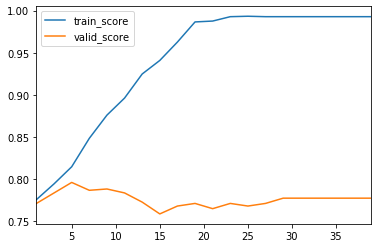

In [7]:
accuracy_forest = pd.DataFrame(columns=columns)
for i in range(1, 41, 2):
    model = RandomForestClassifier(random_state=2020, n_estimators=15, max_depth=i)
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    train_predictions = model.predict(features_train)
    accuracy_train = model.score(features_train, target_train)
    accuracy_valid = model.score(features_valid, target_valid)
    accuracy_forest.loc[i, 'train_score'] = accuracy_train
    accuracy_forest.loc[i, 'valid_score'] = accuracy_valid
    
print(accuracy_forest)
accuracy_forest.plot()

Картина аналогична модели _дерево решений_: при увеличении высоты деревьев модель переобучается на тренировочной выборке и качество на валидационной выборке падает. Лучший результат достигается при *max_depth = 5*.

__Вывод:__ в целом эта модель ведёт себя более стабильно нежели одно _дерево решений_. Для итоговой модели модели выберем следующие значений гиперпараметров: *n_estimators = 15*, *max_depth = 5*

In [8]:
model = RandomForestClassifier(random_state=2020, n_estimators=15, max_depth=5)
model.fit(features_train, target_train)
print('Доля правильных ответов в валидационной выборке:', model.score(features_valid, target_valid))

Доля правильных ответов в валидационной выборке: 0.7962674961119751


### Модель _логистическая регрессия_

In [9]:
model = LogisticRegression(random_state=2020, solver='lbfgs')
model.fit(features_train, target_train)
print('Доля правильных ответов в тренировочной выборке:', model.score(features_train, target_train))
print('Доля правильных ответов в валидационной выборке:', model.score(features_valid, target_valid))

Доля правильных ответов в тренировочной выборке: 0.6991701244813278
Доля правильных ответов в валидационной выборке: 0.6998444790046656


Эта модель показала самые низкие результаты.

## 4. Проверка модели на тестовой выборке

На предыдущем этапе лучшие результаты показала модель случайного леса (n_estimators=15, max_depth=5). Применим её к тестовой выборке.

In [10]:
# Объединим тренировочную и валидационную выборки
features_train_full = features_train.append(features_valid)
target_train_full = target_train.append(target_valid)

model = RandomForestClassifier(random_state=2020, n_estimators=15, max_depth=5)
model.fit(features_train, target_train)
print('Доля правильных ответов в тестовой выборке', model.score(features_test, target_test))

Доля правильных ответов в тестовой выборке 0.8304821150855366


Поставленная задача выполнена, доля правильных ответов более 0.75. Это успех.

## 5. Проверка на адекватность

In [12]:
print('Доля правильных ответов если модель всегда будет классифицировать как 1:', target_test.mean())
print('Доля правильных ответов если модель всегда будет классифицировать как 0:', 1 - target_test.mean())

Доля правильных ответов если модель всегда будет классифицировать как 1: 0.28615863141524106
Доля правильных ответов если модель всегда будет классифицировать как 0: 0.7138413685847589


Если всех клиентов в тестовой выборке классифицировать как пользователей тарифа "Смарт", то доля правильных ответов составит около 0.71. Обученная нами модель превосходит этот результат.